# Grocery Store Accessibility (Racial and Socioeconomic Data)

In [3]:
# import modules
import os
os.environ['USE_PYGEOS'] = '0'
import matplotlib.pyplot as plt
import pandas as pd
from cenpy import products
acs = products.ACS(2019)

/Users/laurennguyen/.gds/lib/python3.10/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [11]:
acs.filter_tables('RACE', by='description')

,description,columns
table_name,,
B02001,RACE,"[B02001_001E, B02001_002E, B02001_003E, B02001..."
B02008,WHITE ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02008_001E]
B02009,BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINAT...,[B02009_001E]
B02010,AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN ...,[B02010_001E]
B02011,ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE...,[B02011_001E]
B02012,NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALO...,[B02012_001E]
B02013,SOME OTHER RACE ALONE OR IN COMBINATION WITH O...,[B02013_001E]
B03002,HISPANIC OR LATINO ORIGIN BY RACE,"[B03002_001E, B03002_002E, B03002_003E, B03002..."
B25006,RACE OF HOUSEHOLDER,"[B25006_001E, B25006_002E, B25006_003E, B25006..."


In [47]:
lane_race = products.ACS(2019).from_county('Lane County, OR', 
                                          level='tract',
                                          variables=['B02008_001E', 'B02009_001E', 'B02010_001E', 'B02011_001E', 'B02012_001E', 'B02013_001E'])

lane_race.head()

/Users/laurennguyen/.gds/lib/python3.10/site-packages/cenpy/products.py:762: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  return self._from_name(county, variables, level, "Counties", **kwargs)


,GEOID,geometry,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E,B02013_001E,NAME,state,county,tract
0,41039000705,"POLYGON ((-13817570.420 5462507.770, -13817562...",3523.0,7.0,226.0,38.0,5.0,32.0,"Census Tract 7.05, Lane County, Oregon",41,039,000705
1,41039004000,"POLYGON ((-13705354.030 5475460.590, -13705335...",2337.0,48.0,126.0,48.0,24.0,26.0,"Census Tract 40, Lane County, Oregon",41,039,004000
2,41039003000,"POLYGON ((-13704040.350 5477214.460, -13704036...",4267.0,90.0,34.0,194.0,12.0,38.0,"Census Tract 30, Lane County, Oregon",41,039,003000
3,41039001202,"POLYGON ((-13712723.380 5432343.990, -13712713...",4130.0,36.0,230.0,58.0,19.0,7.0,"Census Tract 12.02, Lane County, Oregon",41,039,001202
4,41039004900,"POLYGON ((-13700806.520 5470431.210, -13700788...",4352.0,139.0,74.0,267.0,4.0,108.0,"Census Tract 49, Lane County, Oregon",41,039,004900


In [48]:
lane_race['total_est'] = lane_race['B02008_001E'] + lane_race['B02009_001E'] + lane_race['B02010_001E'] + lane_race['B02011_001E'] + lane_race['B02012_001E'] + lane_race['B02013_001E']
lane_race.head(5)

,GEOID,geometry,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E,B02013_001E,NAME,state,county,tract,total_est
0,41039000705,"POLYGON ((-13817570.420 5462507.770, -13817562...",3523.0,7.0,226.0,38.0,5.0,32.0,"Census Tract 7.05, Lane County, Oregon",41,039,000705,3831.0
1,41039004000,"POLYGON ((-13705354.030 5475460.590, -13705335...",2337.0,48.0,126.0,48.0,24.0,26.0,"Census Tract 40, Lane County, Oregon",41,039,004000,2609.0
2,41039003000,"POLYGON ((-13704040.350 5477214.460, -13704036...",4267.0,90.0,34.0,194.0,12.0,38.0,"Census Tract 30, Lane County, Oregon",41,039,003000,4635.0
3,41039001202,"POLYGON ((-13712723.380 5432343.990, -13712713...",4130.0,36.0,230.0,58.0,19.0,7.0,"Census Tract 12.02, Lane County, Oregon",41,039,001202,4480.0
4,41039004900,"POLYGON ((-13700806.520 5470431.210, -13700788...",4352.0,139.0,74.0,267.0,4.0,108.0,"Census Tract 49, Lane County, Oregon",41,039,004900,4944.0


In [49]:
lane_race['white_est_per'] = lane_race['B02008_001E'] / lane_race['total_est']
lane_race['bipoc_est_per'] = (lane_race['B02009_001E'] + lane_race['B02010_001E'] + lane_race['B02011_001E'] + lane_race['B02012_001E'] + lane_race['B02013_001E']) / lane_race['total_est']

In [51]:
lane_race.head(3)

,GEOID,geometry,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E,B02013_001E,NAME,state,county,tract,total_est,white_est_per,bipoc_est_per
0,41039000705,"POLYGON ((-13817570.420 5462507.770, -13817562...",3523.0,7.0,226.0,38.0,5.0,32.0,"Census Tract 7.05, Lane County, Oregon",41,039,000705,3831.0,0.919603,0.080397
1,41039004000,"POLYGON ((-13705354.030 5475460.590, -13705335...",2337.0,48.0,126.0,48.0,24.0,26.0,"Census Tract 40, Lane County, Oregon",41,039,004000,2609.0,0.895745,0.104255
2,41039003000,"POLYGON ((-13704040.350 5477214.460, -13704036...",4267.0,90.0,34.0,194.0,12.0,38.0,"Census Tract 30, Lane County, Oregon",41,039,003000,4635.0,0.920604,0.079396


<AxesSubplot: >

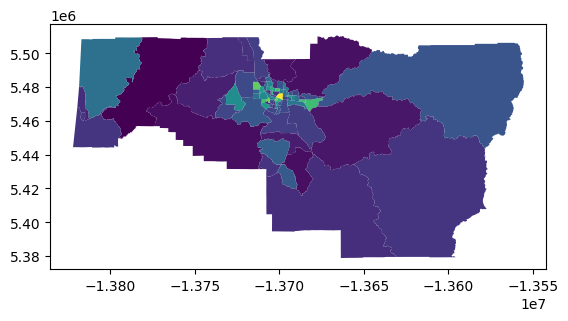

In [53]:
lane_race.plot('bipoc_est_per')

<AxesSubplot: >

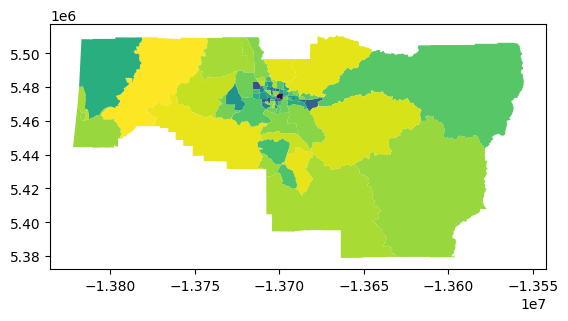

In [54]:
lane_race.plot('white_est_per')